### snowflake-masterclass


# Section 2

In [ ]:
# 7. Getting to know the interface 
'''
 Worksheet where you can write all sql code

* By default it would be available , so below code is not required to execute 

 -- Create a database from the share.
create database snowflake_sample_data from share sfc_samples.sample_data;

-- Grant the PUBLIC role access to the database.
-- Optionally change the role name to restrict access to a subset of users.
grant imported privileges on database snowflake_sample_data to role public;

'''

In [1]:
# 12. TASK  Create afolder 
# keep sql worksheet seperately
# keep pyhon worksheet seperately
# keep snwpark noteook seperately
# Keep the dashboard seperately


## 9. Snowflake Architecutre
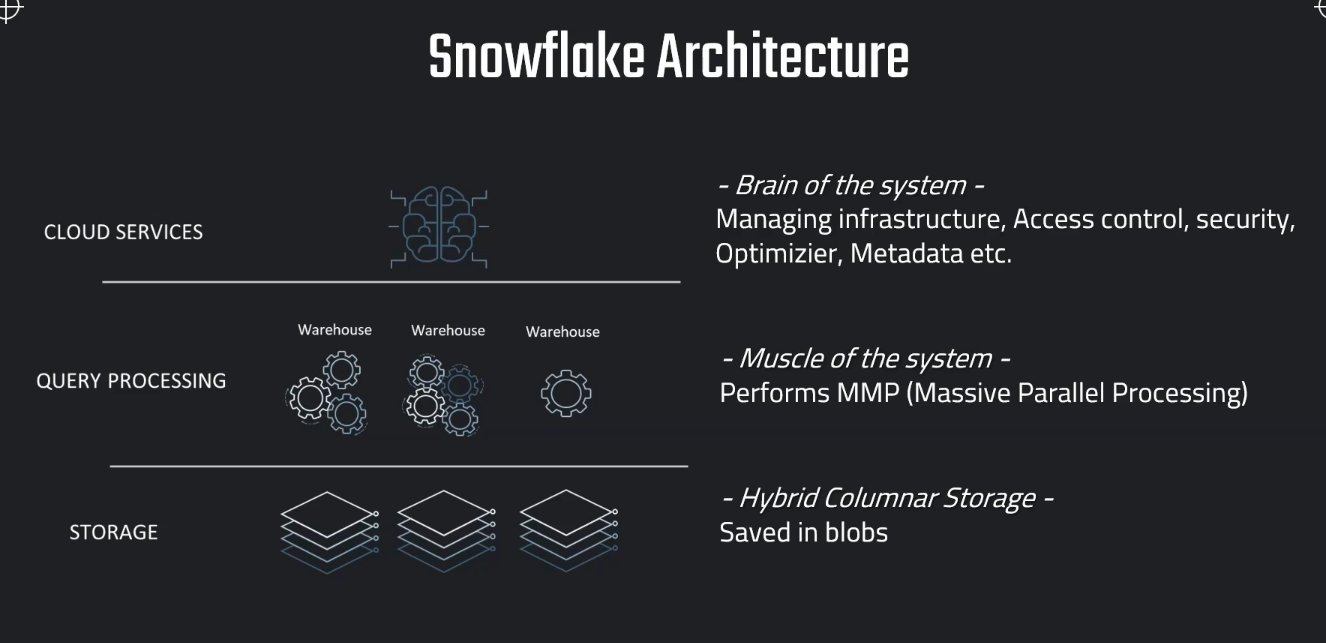

## 12. Setting up Warehouse
* Role: 
* Change the Role => Sysadmin
* Create a new Warhousie
* Type: 
    * Standard  => Defilt
    * snowaprk-optimized=> ML 

* Name: First_warhouse
* AutoResume
* Auto Suspemd
* Multi=clsuter warhouse [ MIN : MAX ], scalingPolicy: Standard/Economy
* Query Accelration => Performance*

* Choose this warehouse for worksheet

In [4]:
## 11. Setting up warehouse using SQL
'''
    create or replace warehouse SECOND_WH
    WITH 
    WAREHOUSE_SIZE = XS OR XSMALL
    AUTO_SUSPEND = 300 
    SCALING_POLICY = 'ECONOMY'
    MIN_CLUSTER_COUNT = 1
    MAX_CLUSTER_COUNT = 3
    INITIALLY_SUSPENDED = TRUE 
    COMMENT = 'This is our Second Warehouse'
'''
# CTRL+ENTER 

"\n    create or replace warehouse SECOND_WH\n    WITH \n    WAREHOUSE_SIZE = XS OR XSMALL\n    AUTO_SUSPEND = 300 \n    SCALING_POLICY = 'ECONOMY'\n    MIN_CLUSTER_COUNT = 1\n    MAX_CLUSTER_COUNT = 3\n    INITIALLY_SUSPENDED = TRUE \n    COMMENT = 'This is our Second Warehouse'\n"

## 12. MANAGER WAREHOUSE
* ALTER WAREHOUSE SECOND_WH SET AUTO_SUPEND = 60 
* DROP WAREHOUSE SECOND_WH
* Can be modified from SNOWFLAKE UI

## 13. Scaling Policy
## 14. Exploring tables & Databases
 * Create database from UI
 * TYPES
    * Standard Database
    * Shared Database
 * Add Additinal Previleges
 * Create Schema / Grant OPtions

 * FIRST_DB => FIRST_SCHEMA 
   * Check Create Statement [ ]

In [5]:
## 15. Loading data into snowflakes
# Loading Data 
#//Creating the table / Meta data

'''
ALTER DATABASE FIRST_DB RENAME TO OUR_FIRST_DB;

create DATABASE OUR_FIRST_DB;

CREATE TABLE "OUR_FIRST_DB"."PUBLIC"."LOAN_PAYMENT" (
  "Loan_ID" STRING,
  "loan_status" STRING,
  "Principal" STRING,
  "terms" STRING,
  "effective_date" STRING,
  "due_date" STRING,
  "paid_off_time" STRING,
  "past_due_days" STRING,
  "age" STRING,
  "education" STRING,
  "Gender" STRING
);
  
  
 //Check that table is empy
 USE DATABASE OUR_FIRST_DB;

 SELECT * FROM LOAN_PAYMENT;


 //Loading the data from S3 bucket
 COPY INTO LOAN_PAYMENT
    FROM s3://bucketsnowflakes3/Loan_payments_data.csv
    file_format = (type = csv field_delimiter = ',' skip_header=1);
    

-- Validate
SELECT * FROM LOAN_PAYMENT;

 -- No compute invocled 
 select count(*) from LOAN_PAYMENT;
 select *  from LOAN_PAYMENT;

 -- Compute invoved  
 select max("age") from LOAN_PAYMENT;

 '''

'\ncreate DATABASE OUR_FIRST_DB;\n\nCREATE TABLE "OUR_FIRST_DB"."PUBLIC"."LOAN_PAYMENT" (\n  "Loan_ID" STRING,\n  "loan_status" STRING,\n  "Principal" STRING,\n  "terms" STRING,\n  "effective_date" STRING,\n  "due_date" STRING,\n  "paid_off_time" STRING,\n  "past_due_days" STRING,\n  "age" STRING,\n  "education" STRING,\n  "Gender" STRING\n);\n  \n  \n //Check that table is empy\n USE DATABASE OUR_FIRST_DB;\n\n SELECT * FROM LOAN_PAYMENT;\n\n\n //Loading the data from S3 bucket\n COPY INTO LOAN_PAYMENT\n    FROM s3://bucketsnowflakes3/Loan_payments_data.csv\n    file_format = (type = csv \n                   field_delimiter = \',\' \n                   skip_header=1);\n    \n\n-- Validate\nSELECT * FROM LOAN_PAYMENT;\n\n -- No compute invocled \n select count(*) from LOAN_PAYMENT;\n select *  from LOAN_PAYMENT;\n\n -- Compute invoved  \n select max("age") from LOAN_PAYMENT;\n\n '